## Customer-Churn Project

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import joblib

In [57]:
df = pd.read_csv('customer_churn_data.csv')

In [58]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


In [59]:
# Checking for missinng values
df.isnull().mean()*100 # Percentage of missing values in each column

CustomerID          0.0
Age                 0.0
Gender              0.0
Tenure              0.0
MonthlyCharges      0.0
ContractType        0.0
InternetService    29.7
TotalCharges        0.0
TechSupport         0.0
Churn               0.0
dtype: float64

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


In [65]:
df['InternetService'] = df['InternetService'].fillna("")

In [66]:
# Checking for duplicated rows
df.duplicated().sum()

np.int64(0)

In [67]:
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


In [68]:
# Plot settings
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [70]:
# Step 2: Basic Cleanup
df.drop(columns=["CustomerID"], inplace=True)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df.dropna(inplace=True)

In [71]:
df.head()

,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,42,Male,32,69.01,Month-to-Month,,2208.32,No,Yes


## ---------------------------
### Exploratory Data Analysis (EDA)
## ---------------------------

In [73]:
print("📌 Dataset Shape:", df.shape)
print("\n🔍 Data Types:\n", df.dtypes)
print("\n🧹 Null Values:\n", df.isnull().sum())
print("\n🎯 Target Distribution:\n", df["Churn"].value_counts(normalize=True))

📌 Dataset Shape: (1000, 9)

🔍 Data Types:
 Age                  int64
Gender              object
Tenure               int64
MonthlyCharges     float64
ContractType        object
InternetService     object
TotalCharges       float64
TechSupport         object
Churn               object
dtype: object

🧹 Null Values:
 Age                0
Gender             0
Tenure             0
MonthlyCharges     0
ContractType       0
InternetService    0
TotalCharges       0
TechSupport        0
Churn              0
dtype: int64

🎯 Target Distribution:
 Churn
Yes    0.883
No     0.117
Name: proportion, dtype: float64


C:\Users\Rafy Mustafa\AppData\Local\Temp\ipykernel_10016\230011301.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Churn", palette="Set2")


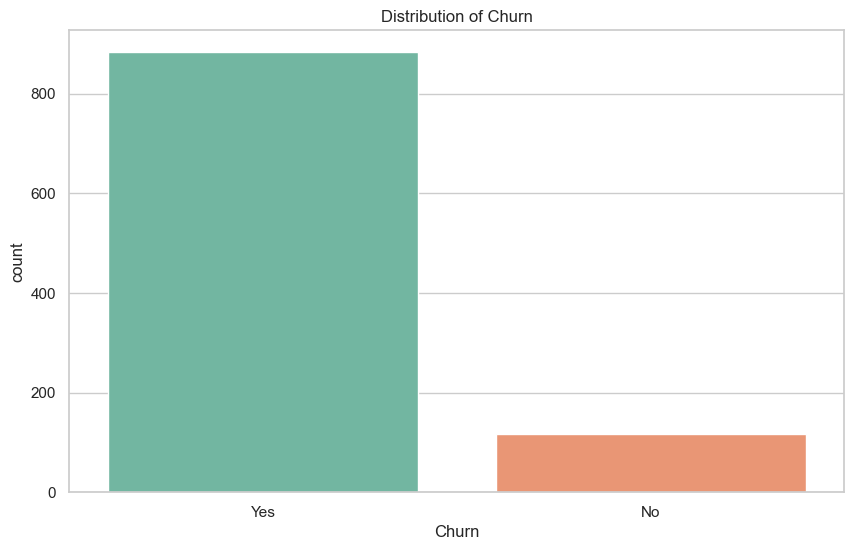

In [74]:
# Churn distribution
sns.countplot(data=df, x="Churn", palette="Set2")
plt.title("Distribution of Churn")
plt.show()

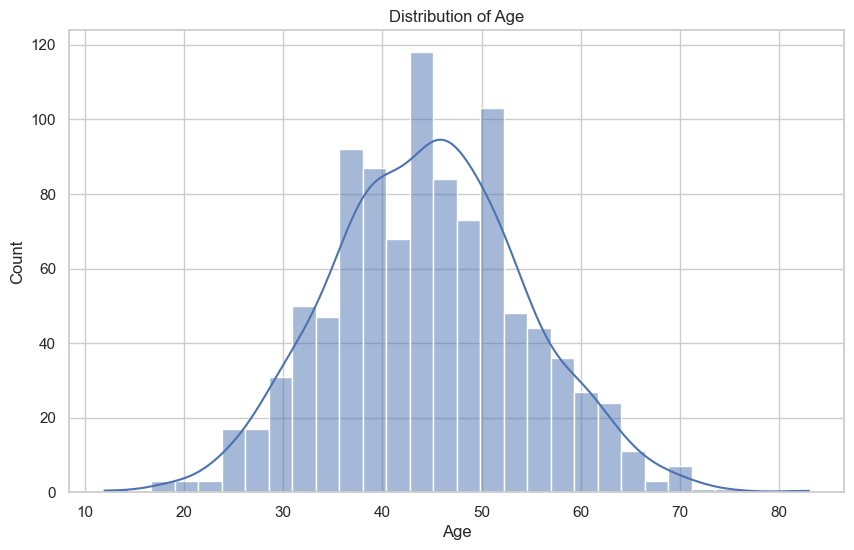

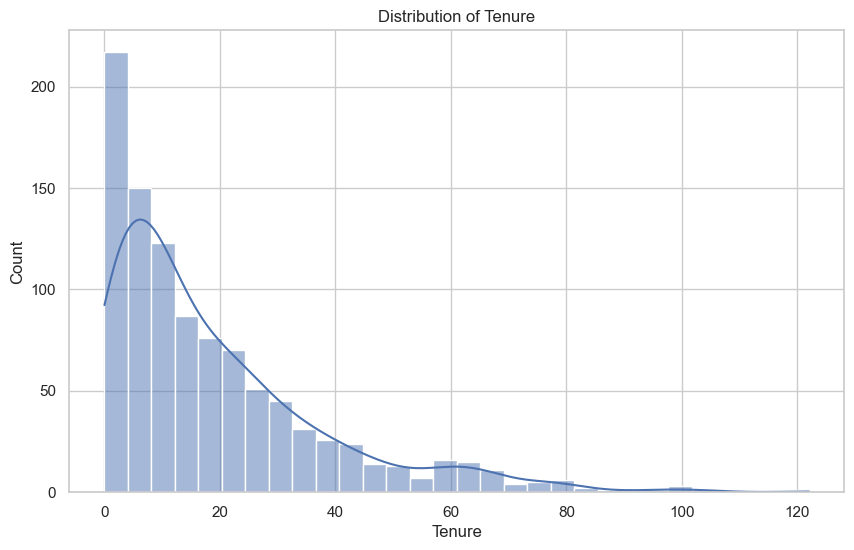

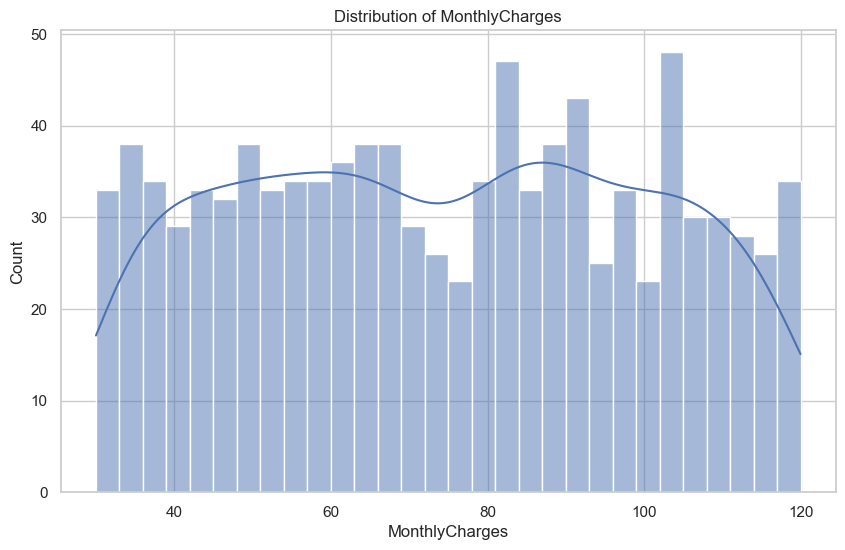

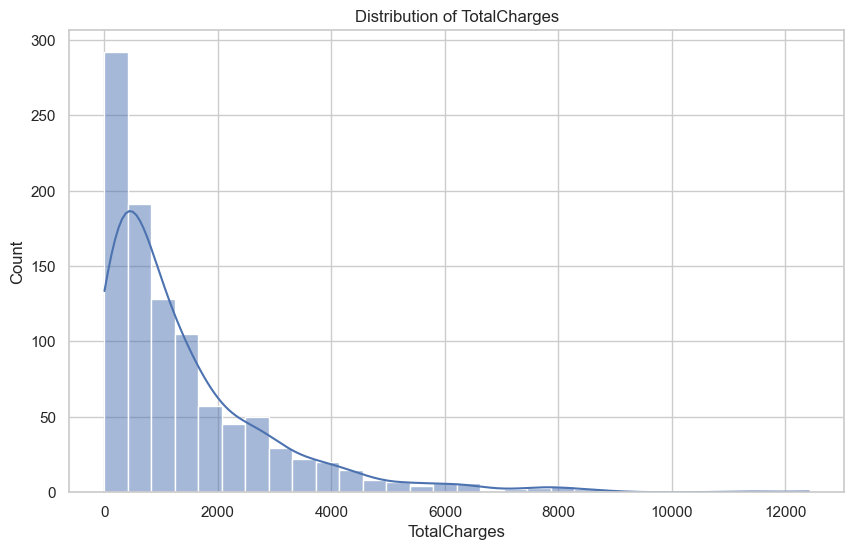

In [76]:
# Numeric distributions
numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns
for col in numerical_columns:
    plt.figure()
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

C:\Users\Rafy Mustafa\AppData\Local\Temp\ipykernel_10016\2892989152.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette="coolwarm")


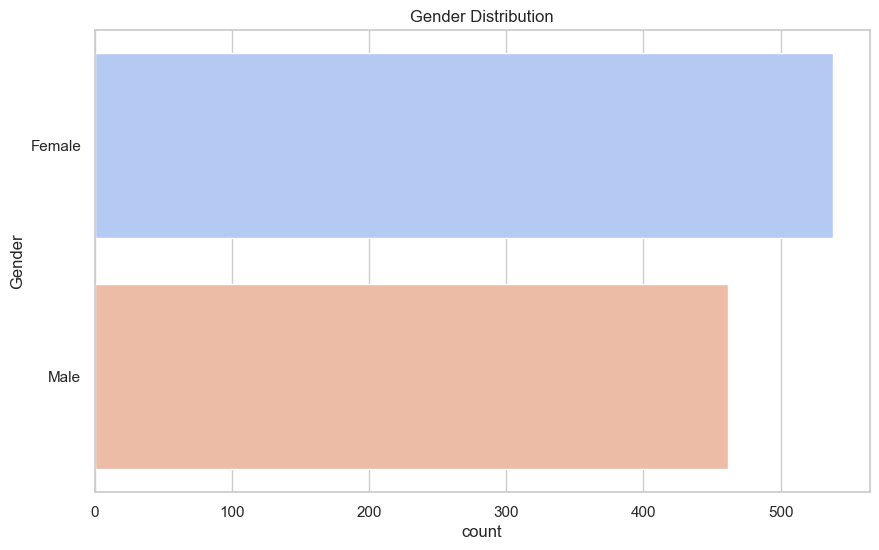

C:\Users\Rafy Mustafa\AppData\Local\Temp\ipykernel_10016\2892989152.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette="coolwarm")


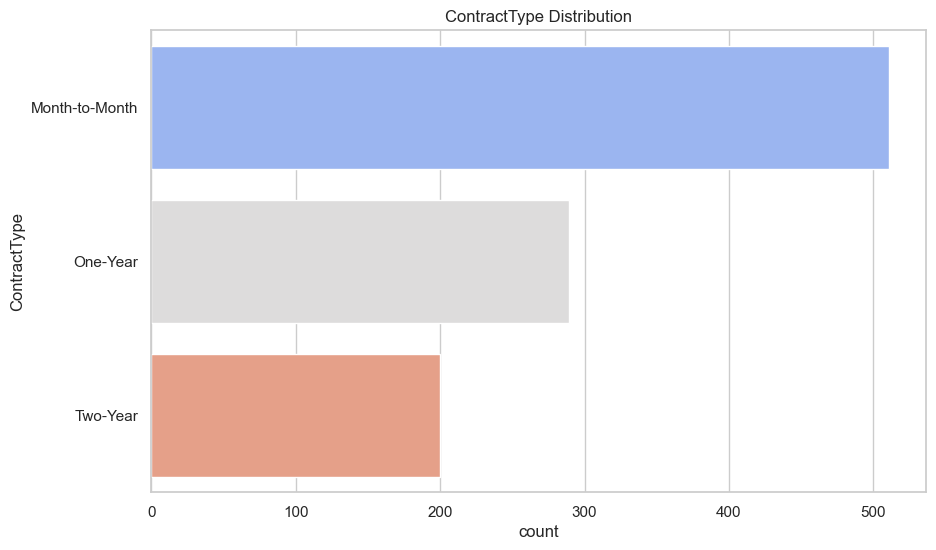

C:\Users\Rafy Mustafa\AppData\Local\Temp\ipykernel_10016\2892989152.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette="coolwarm")


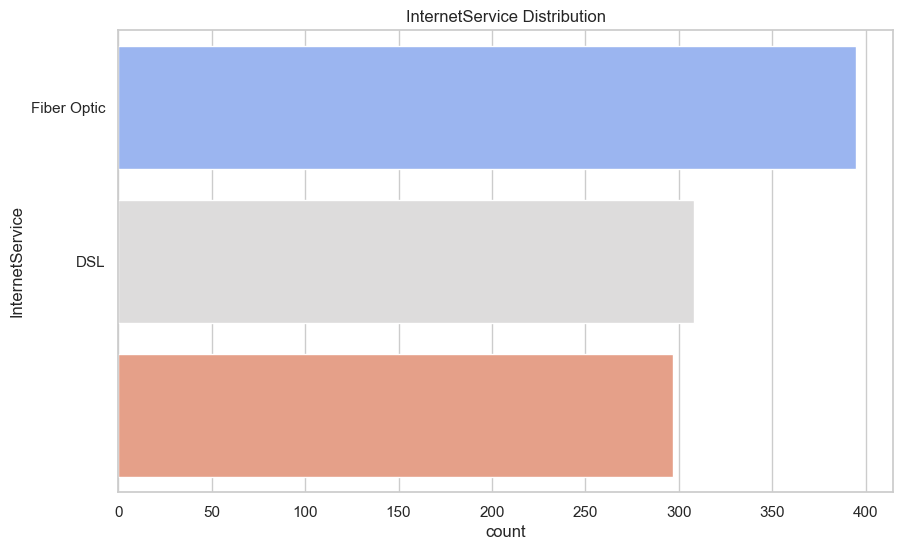

C:\Users\Rafy Mustafa\AppData\Local\Temp\ipykernel_10016\2892989152.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette="coolwarm")


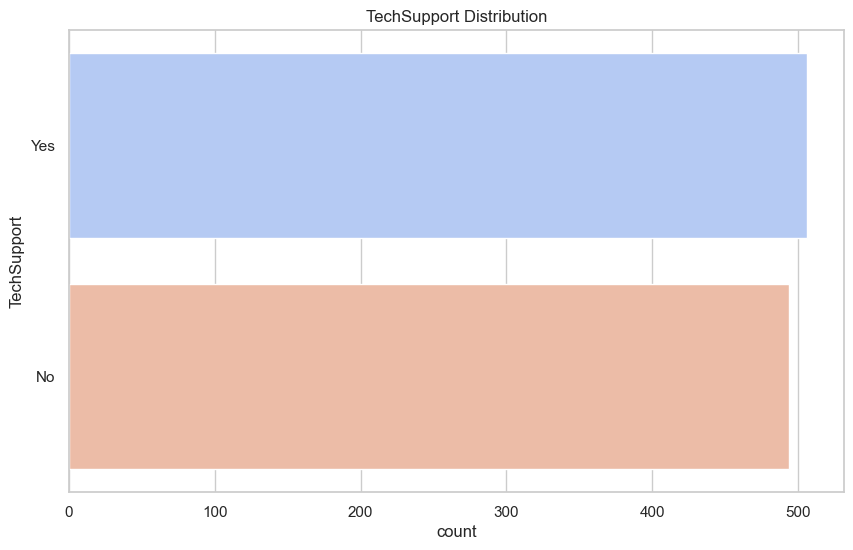

In [77]:
# Categorical distributions
categorical_columns = df.select_dtypes(include=["object"]).drop(columns="Churn").columns
for col in categorical_columns:
    plt.figure()
    sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette="coolwarm")
    plt.title(f"{col} Distribution")
    plt.show()

f:\Developershub-Corporation\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


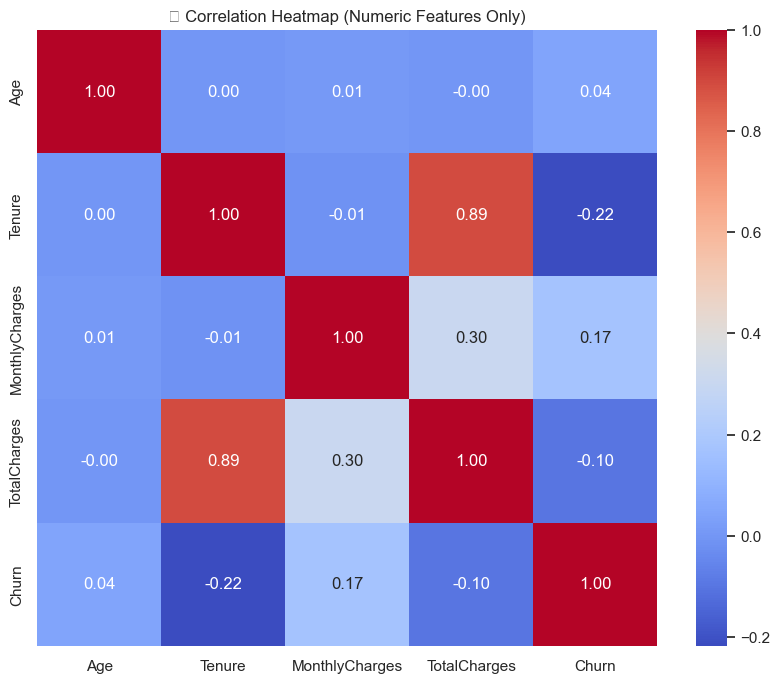

In [81]:
# Correlation heatmap
df_corr = df.copy()
df_corr["Churn"] = df_corr["Churn"].map({"Yes": 1, "No": 0})

# Keeping only numeric columns for correlation
numeric_df = df_corr.select_dtypes(include=["int64", "float64"])

# Now generate heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("🔗 Correlation Heatmap (Numeric Features Only)")
plt.show()


C:\Users\Rafy Mustafa\AppData\Local\Temp\ipykernel_10016\3356326901.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Churn", y=col, palette="pastel")


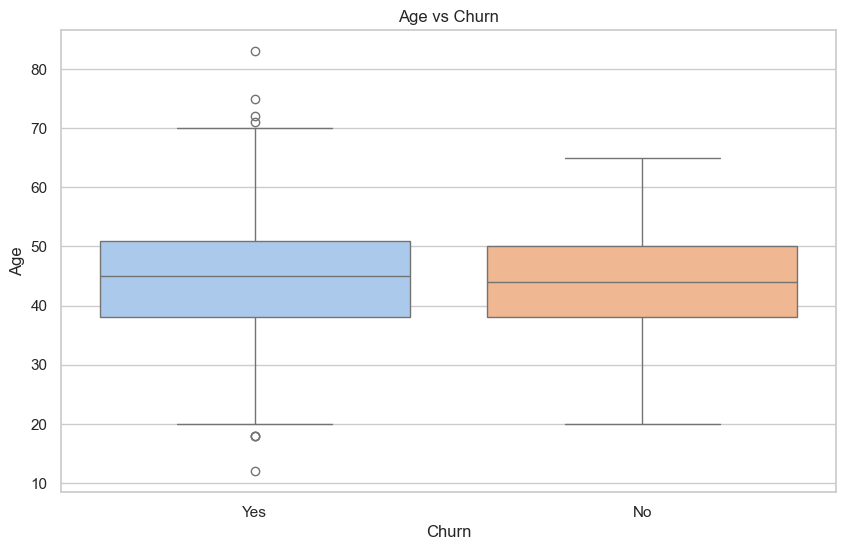

C:\Users\Rafy Mustafa\AppData\Local\Temp\ipykernel_10016\3356326901.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Churn", y=col, palette="pastel")


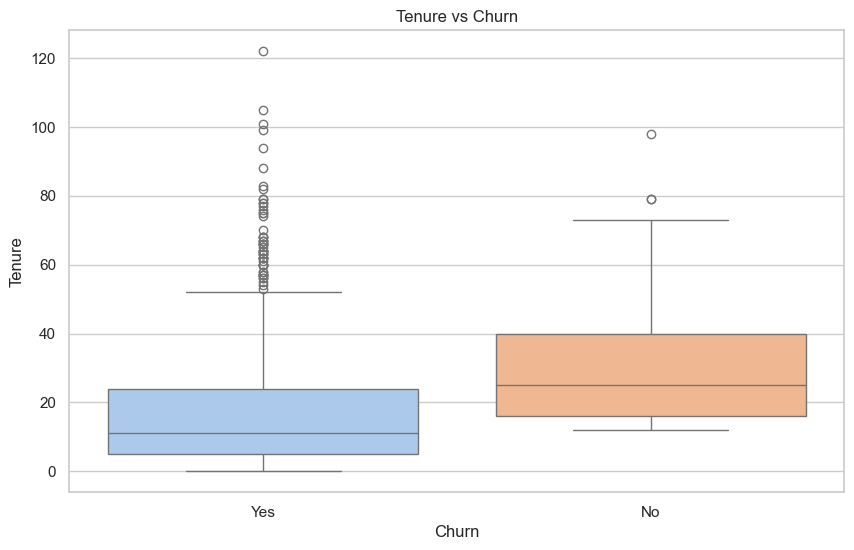

C:\Users\Rafy Mustafa\AppData\Local\Temp\ipykernel_10016\3356326901.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Churn", y=col, palette="pastel")


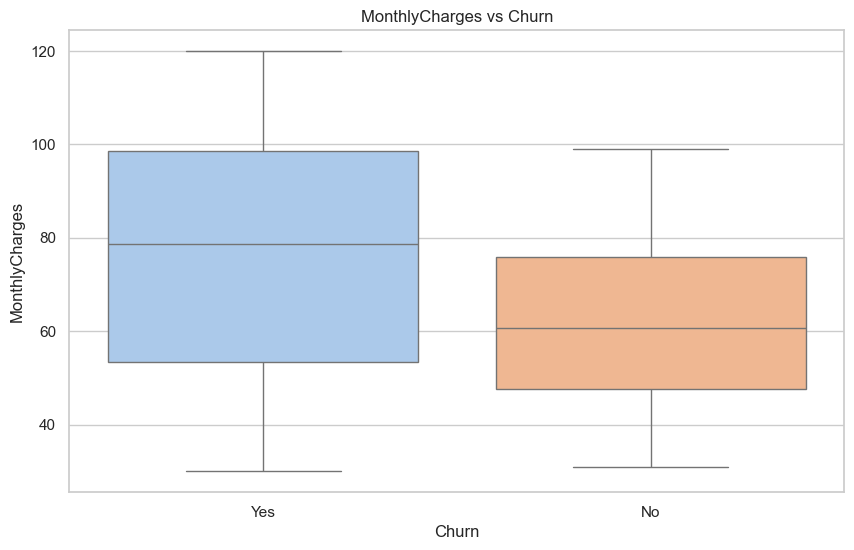

C:\Users\Rafy Mustafa\AppData\Local\Temp\ipykernel_10016\3356326901.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Churn", y=col, palette="pastel")


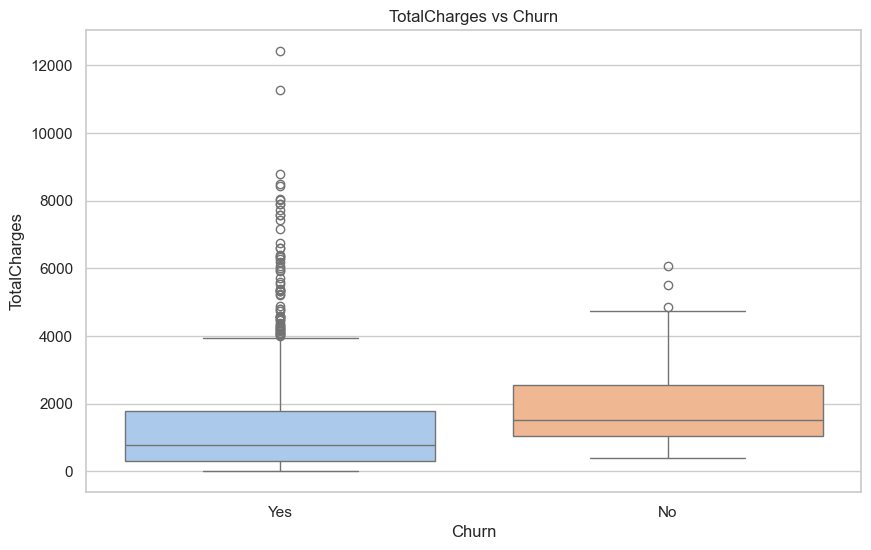

In [82]:

# Churn vs Numeric Features
for col in numerical_columns:
    plt.figure()
    sns.boxplot(data=df, x="Churn", y=col, palette="pastel")
    plt.title(f"{col} vs Churn")
    plt.show()

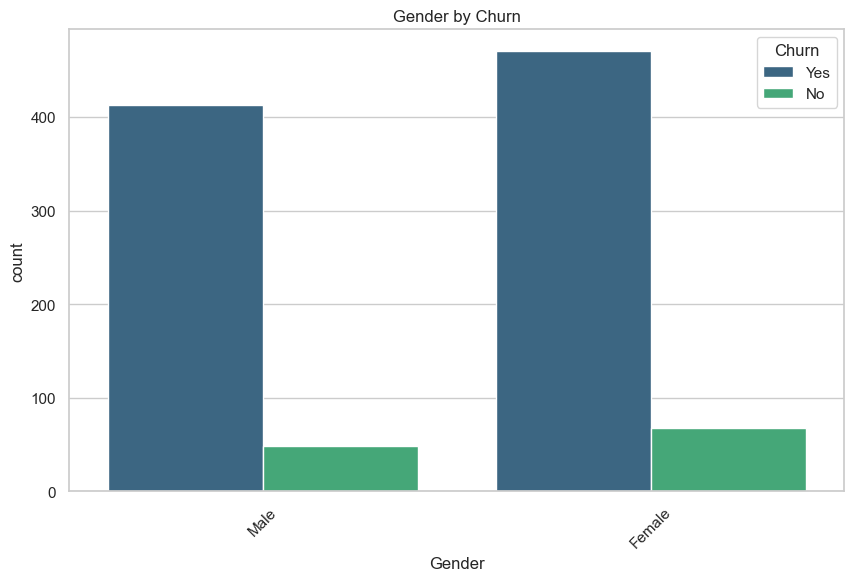

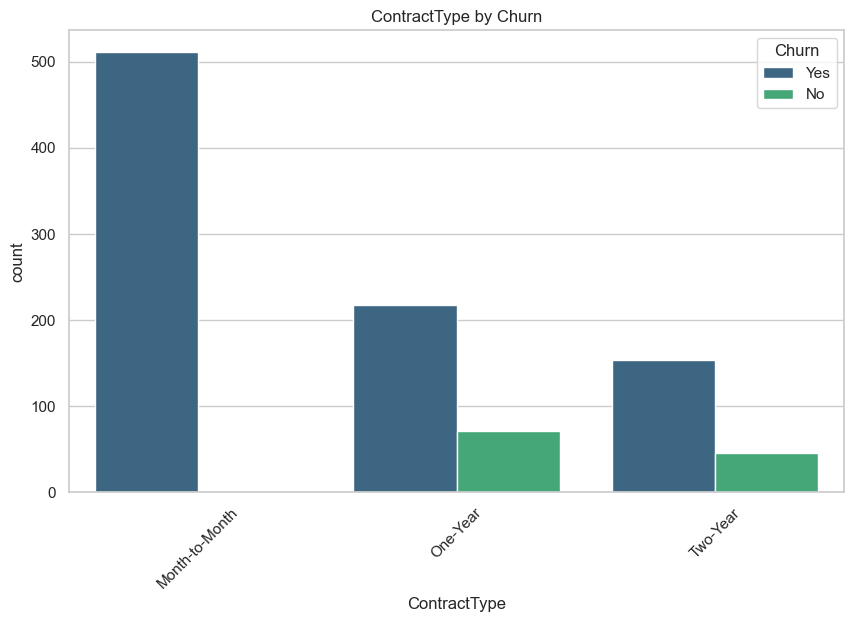

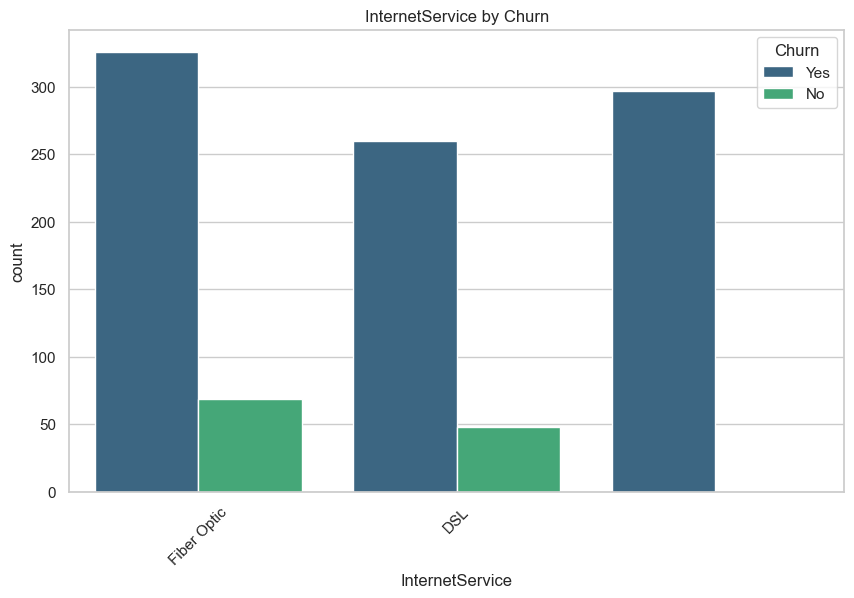

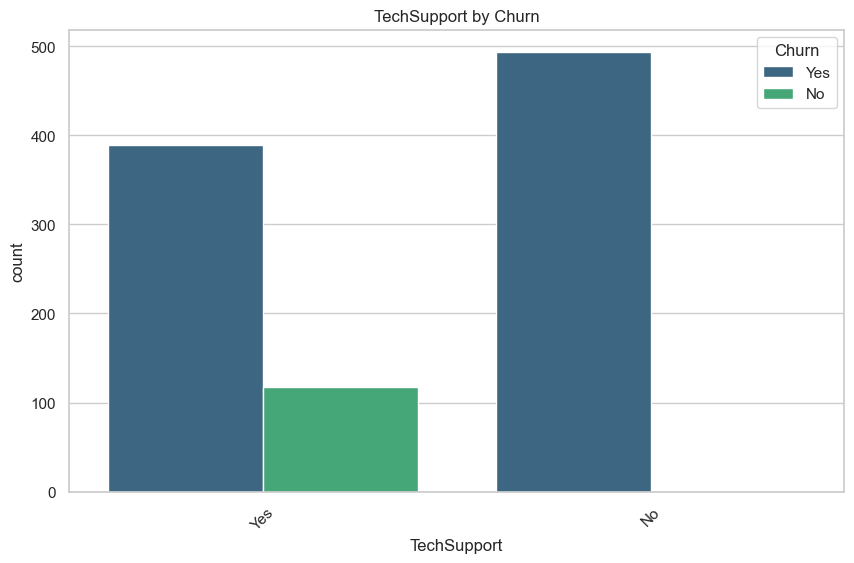

In [83]:
# Churn vs Categorical Features
for col in categorical_columns:
    plt.figure()
    sns.countplot(data=df, x=col, hue="Churn", palette="viridis")
    plt.title(f"{col} by Churn")
    plt.xticks(rotation=45)
    plt.show()

In [85]:
# 4.  Feature & Target Split

X = df.drop("Churn", axis=1)
y = df["Churn"].map({"Yes": 1, "No": 0})

In [86]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [87]:

# 5. Preprocessing with ColumnTransformer


In [88]:

numeric_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = X.select_dtypes(include=["object"]).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)
])


In [89]:
# 6. ML Pipelines

In [90]:
logreg = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

rf = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("classifier", RandomForestClassifier())
])

In [91]:
# 7. GridSearchCV for Tuning

In [92]:
param_grid_logreg = {
    "classifier__C": [0.01, 0.1, 1, 10],
    "classifier__solver": ["liblinear"]
}

param_grid_rf = {
    "classifier__n_estimators": [100, 200],
    "classifier__max_depth": [5, 10, None],
    "classifier__min_samples_split": [2, 5]
}

In [94]:
print("\n Tuning Logistic Regression...")
grid_logreg = GridSearchCV(logreg, param_grid_logreg, cv=5, scoring="accuracy", n_jobs=-1)
grid_logreg.fit(X_train, y_train)

print("\n Tuning Random Forest...")
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring="accuracy", n_jobs=-1)
grid_rf.fit(X_train, y_train)


 Tuning Logistic Regression...

 Tuning Random Forest...


,estimator,Pipeline(step...lassifier())])
,param_grid,"{'classifier__max_depth': [5, 10, ...], 'classifier__min_samples_split': [2, 5], 'classifier__n_estimators': [100, 200]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('cat', ...)]"


In [95]:
# 8. Model Evaluation

In [96]:
print("\n Logistic Regression Report:")
y_pred_lr = grid_logreg.predict(X_test)
print(classification_report(y_test, y_pred_lr))

print("\n Random Forest Report:")
y_pred_rf = grid_rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))


 Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.89        23
           1       0.99      0.98      0.99       177

    accuracy                           0.97       200
   macro avg       0.93      0.95      0.94       200
weighted avg       0.98      0.97      0.98       200


 Random Forest Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00       177

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [97]:
# 9. Saving the Best Model

In [98]:
best_model = grid_rf.best_estimator_ if grid_rf.best_score_ > grid_logreg.best_score_ else grid_logreg.best_estimator_
joblib.dump(best_model, "telco_churn_model.joblib")
print("\n Best model exported as 'telco_churn_model.joblib'")


 Best model exported as 'telco_churn_model.joblib'
